In [5]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [6]:
import pandas_datareader.data as web

In [8]:
# for stock in tech_list:   
#     globals()[stock] = web.get_data_google(stock,start,end)

# そのあとの、Adj Closeは、Closeで代用いただければと思います。

In [7]:
from datetime import datetime

In [8]:
tech_list=['AAPL','GOOG','MSFT','AMZN']

In [15]:
end = datetime.now()
start = datetime(end.year-1, end.month, end.day)
print(end)

2018-01-28 13:30:33.479348


In [16]:
from pandas_datareader.google.daily import GoogleDailyReader
@property
def url(self):
    return 'http://finance.google.com/finance/historical'
GoogleDailyReader.url = url

In [17]:
for stock in tech_list:
    globals()[stock] = web.get_data_google(stock,start,end)

In [18]:
# globals()は文字列をそのままPythonのコードにするためで、tech_listに並んでいる文字列がそのままDataFrameになります。
type(AAPL)

pandas.core.frame.DataFrame

In [19]:
AAPL.describe()

,Open,High,Low,Close,Volume
count,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,154.476853,155.464582,153.457610,154.548367,2.732269e+07
std,13.164914,13.252186,12.973112,13.087352,1.144840e+07
min,120.930000,121.390000,120.620000,121.350000,1.402667e+07
25%,143.915000,144.675000,143.185000,143.865000,2.034815e+07
50%,154.000000,154.720000,153.310000,153.950000,2.440953e+07
75%,163.775000,164.385000,163.045000,163.675000,3.078636e+07
max,179.370000,180.100000,178.250000,179.260000,1.119850e+08


In [20]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2017-01-30 to 2018-01-26
Data columns (total 5 columns):
Open      251 non-null float64
High      251 non-null float64
Low       251 non-null float64
Close     251 non-null float64
Volume    251 non-null int64
dtypes: float64(4), int64(1)
memory usage: 11.8 KB


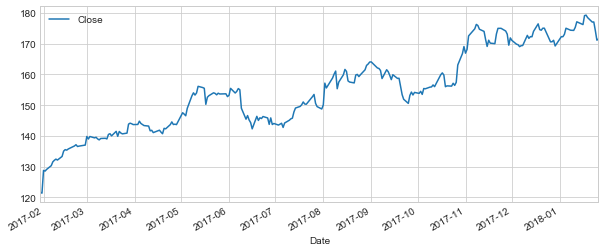

In [21]:
AAPL['Close'].plot(legend=True, figsize=(10,4))

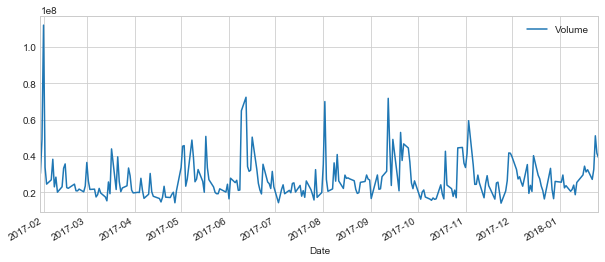

In [22]:
AAPL['Volume'].plot(legend=True, figsize=(10,4))

移動平均線
単純な折れ線グラフではなく、移動平均線（moving average）と呼ばれるグラフを描いてみましょう。


In [23]:
ma_day = [10,20,50]
for ma in ma_day:
    column_name = 'MA {}'.format(ma)
    AAPL[column_name] = pd.rolling_mean(AAPL['Close'], ma)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).mean()
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=20,center=False).mean()
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=50,center=False).mean()
  after removing the cwd from sys.path.


In [24]:
AAPL.head()

,Open,High,Low,Close,Volume,MA 10,MA 20,MA 50
Date,,,,,,,,
2017-01-30,120.93,121.63,120.66,121.63,30377503,NaN,NaN,NaN
2017-01-31,121.15,121.39,120.62,121.35,49200993,NaN,NaN,NaN
2017-02-01,127.03,130.49,127.01,128.75,111985040,NaN,NaN,NaN
2017-02-02,127.98,129.39,127.78,128.53,33710411,NaN,NaN,NaN
2017-02-03,128.31,129.19,128.16,129.08,24507301,NaN,NaN,NaN


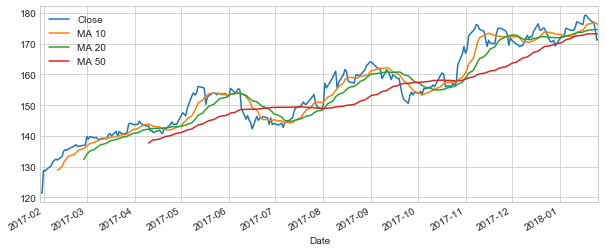

In [25]:
AAPL[['Close','MA 10', 'MA 20', 'MA 50']].plot(subplots = False, figsize=(10,4))

In [26]:
AAPL['Daily Return'] = AAPL['Close'].pct_change()

In [27]:
AAPL.head()

,Open,High,Low,Close,Volume,MA 10,MA 20,MA 50,Daily Return
Date,,,,,,,,,
2017-01-30,120.93,121.63,120.66,121.63,30377503,NaN,NaN,NaN,NaN
2017-01-31,121.15,121.39,120.62,121.35,49200993,NaN,NaN,NaN,-0.002302
2017-02-01,127.03,130.49,127.01,128.75,111985040,NaN,NaN,NaN,0.060981
2017-02-02,127.98,129.39,127.78,128.53,33710411,NaN,NaN,NaN,-0.001709
2017-02-03,128.31,129.19,128.16,129.08,24507301,NaN,NaN,NaN,0.004279


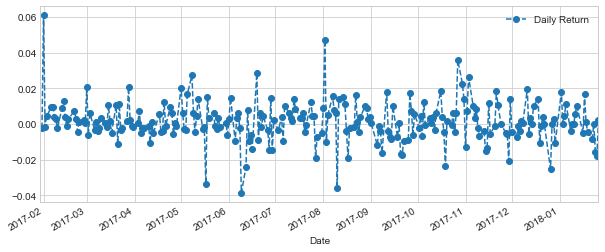

In [28]:
AAPL['Daily Return'].plot(figsize=(10,4), legend = True, linestyle = '--', marker='o')

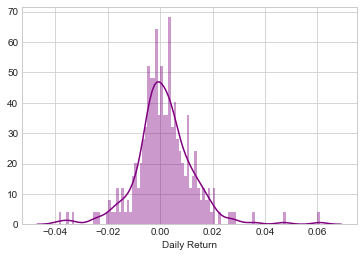

In [29]:
sns.distplot(AAPL['Daily Return'].dropna(), bins=100, color='purple')

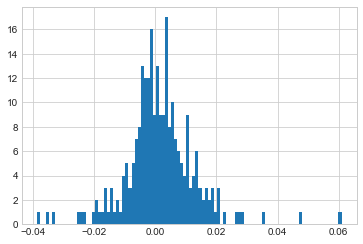

In [30]:
AAPL['Daily Return'].hist(bins=100)

In [31]:
closing_df = web.get_data_google(['AAPL','GOOG','MSFT','AMZN'],start,end)['Close']

In [32]:
closing_df .head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2017-01-30,121.63,830.38,802.32,65.13
2017-01-31,121.35,823.48,796.79,64.65
2017-02-01,128.75,832.35,795.70,63.58
2017-02-02,128.53,839.95,798.53,63.17
2017-02-03,129.08,810.20,801.49,63.68


In [33]:
tech_rets = closing_df.pct_change()

In [34]:
tech_rets.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2017-01-30,NaN,NaN,NaN,NaN
2017-01-31,-0.002302,-0.008309,-0.006893,-0.007370
2017-02-01,0.060981,0.010771,-0.001368,-0.016551
2017-02-02,-0.001709,0.009131,0.003557,-0.006449
2017-02-03,0.004279,-0.035419,0.003707,0.008073


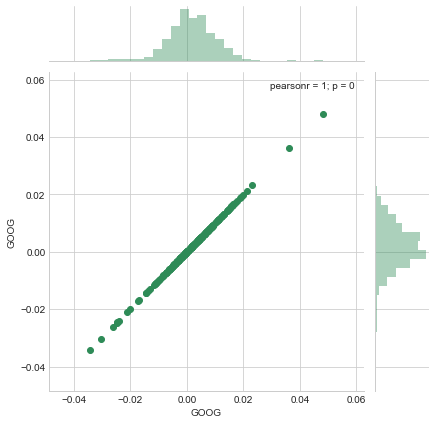

In [36]:
sns.jointplot('GOOG','GOOG',tech_rets, kind = 'scatter', color = 'seagreen')

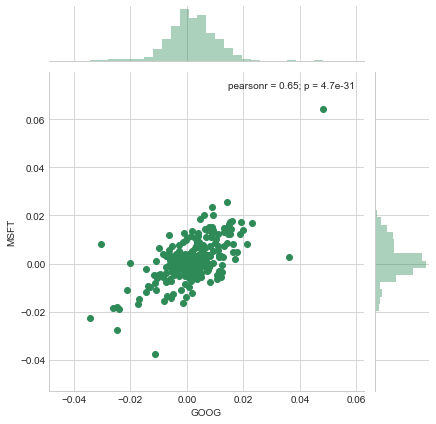

In [37]:
sns.jointplot('GOOG','MSFT',tech_rets, kind = 'scatter', color = 'seagreen')

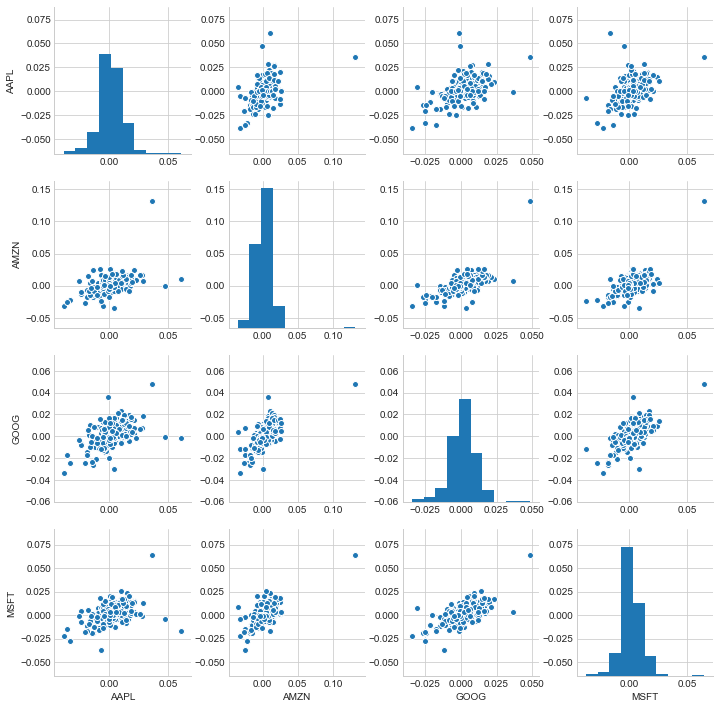

In [38]:
sns.pairplot(tech_rets.dropna())

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\contour.py:967: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)


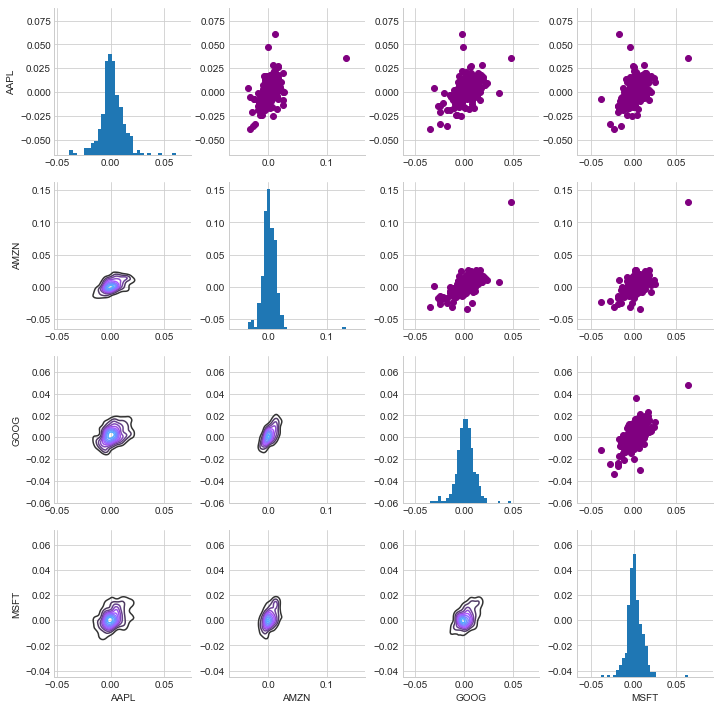

In [39]:
returns_fig = sns.PairGrid(tech_rets.dropna())
returns_fig.map_upper(plt.scatter, color = 'purple')
returns_fig.map_lower(sns.kdeplot, cmap='cool_d')
returns_fig.map_diag(plt.hist, bins=30)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\contour.py:967: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)


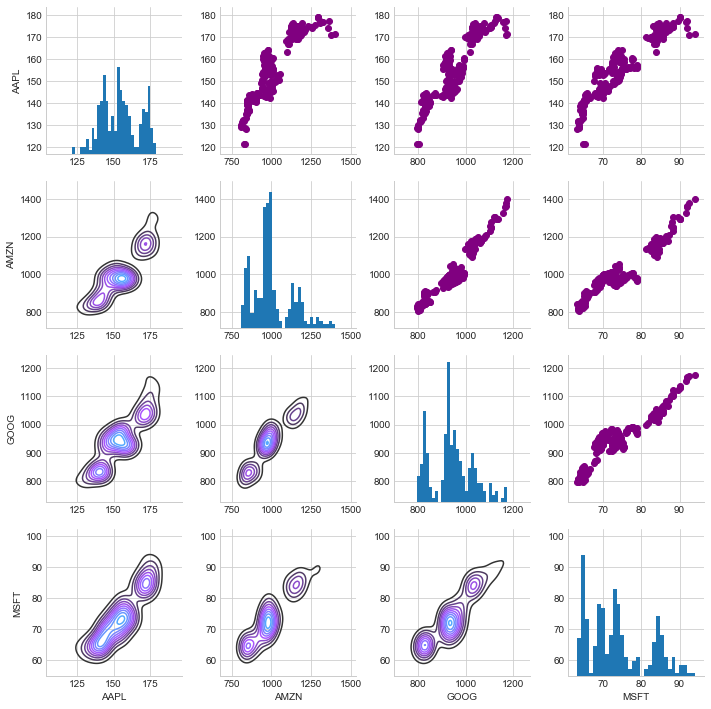

In [40]:
returns_fig = sns.PairGrid(closing_df)
returns_fig.map_upper(plt.scatter, color = 'purple')
returns_fig.map_lower(sns.kdeplot, cmap='cool_d')
returns_fig.map_diag(plt.hist, bins=30)

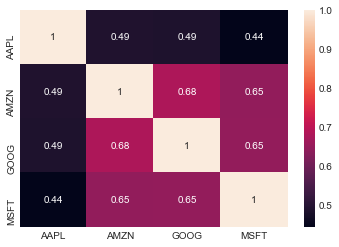

In [42]:
sns.heatmap(tech_rets.corr(), annot=True)

In [48]:
rets = tech_rets.dropna()

In [49]:
rets.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2017-01-31,-0.002302,-0.008309,-0.006893,-0.007370
2017-02-01,0.060981,0.010771,-0.001368,-0.016551
2017-02-02,-0.001709,0.009131,0.003557,-0.006449
2017-02-03,0.004279,-0.035419,0.003707,0.008073
2017-02-06,0.009374,-0.003160,-0.000187,-0.000628


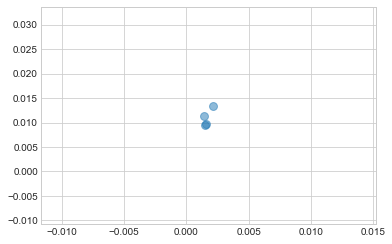

In [50]:
plt.scatter(rets.mean(), rets.std(), alpha=0.5, s = np.pi*20)

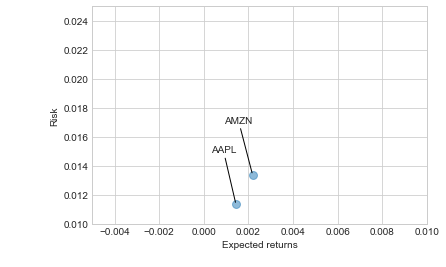

In [51]:
plt.scatter(rets.mean(), rets.std(), alpha=0.5, s = np.pi*20)
plt.ylim([0.01, 0.025])
plt.xlim([-0.005, 0.01])

plt.xlabel('Expected returns')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy =(x,y), xytext=(0,50),
                textcoords = 'offset points',ha = 'right', va='bottom',
                arrowprops = dict(arrowstyle="-", connectionstyle='arc3'))

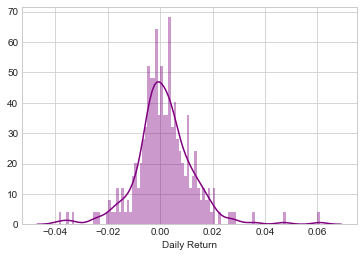

In [52]:
sns.distplot(AAPL['Daily Return'].dropna(), bins=100, color='purple')

In [53]:
rets['AAPL'].quantile(0.05)

-0.01613785802485497

In [54]:
days = 365
dt = 1/days
mu = rets.mean()['GOOG']
sigma = rets.std()['GOOG']

In [57]:
def stock_monte_carlo(start_price, days, mu, sigma):
    price = np.zeros(days)
    price[0] = start_price
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1, days):
        shock[x] = np.random.normal(loc=mu * dt,scale=sigma * np.sqrt(dt))
        drift[x] = mu * dt
        price[x] = price[x-1] + (price[x-1] * (drift[x]+shock[x]))
    return price

In [58]:
GOOG.head()

,Open,High,Low,Close,Volume
Date,,,,,
2017-01-30,814.66,815.84,799.80,802.32,3246573
2017-01-31,796.86,801.25,790.52,796.79,2160556
2017-02-01,799.68,801.19,791.19,795.70,2029744
2017-02-02,793.80,802.70,792.00,798.53,1532138
2017-02-03,802.99,806.00,800.37,801.49,1463448


In [66]:
start_price = GOOG.iloc[0,3]
start_price

802.32000000000005

Text(0.5,1,'Monte Carlo Analysis')

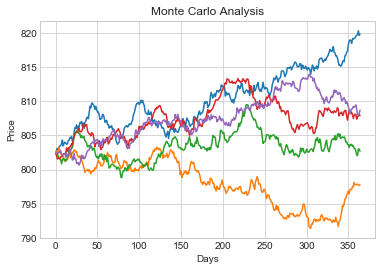

In [67]:
for run in range(5):
    plt.plot(stock_monte_carlo(start_price, days, mu, sigma))
    
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis')

In [72]:
runs = 10000
simulations = np.zeros(runs)
np.set_printoptions(threshold=5)
for run in range(runs):
    simulations[run] = stock_monte_carlo(start_price, days, mu, sigma)[days-1]
    

(array([ 1.,  0.,  0., ...,  0.,  0.,  2.]),
 array([ 774.38697284,  774.67764283,  774.96831282, ...,  831.939631  ,
         832.23030099,  832.52097098]),
 <a list of 200 Patch objects>)

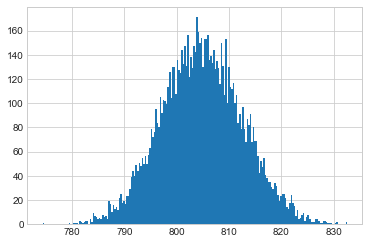

In [74]:
# 10000個の最終的なシミュレーション結果のヒストグラムです。
plt.hist(simulations,bins=200)

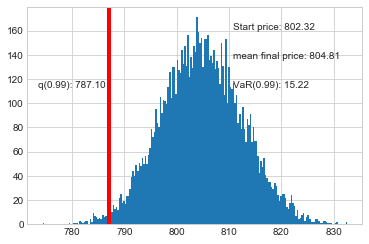

In [77]:
q = np.percentile(simulations, 1)
plt.hist(simulations, bins=200)

plt.figtext(0.6, 0.8, s="Start price: {:0.2f}".format(start_price))
plt.figtext(0.6, 0.7, 'mean final price: {:0.2f}'.format(simulations.mean()))
plt.figtext(0.6, 0.6, 'VaR(0.99): {:0.2f}'.format(start_price-q))
plt.figtext(0.15, 0.6, 'q(0.99): {:0.2f}'.format(q))

plt.axvline(x = q, linewidth=4, color= 'r')